In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wave
%matplotlib inline

2023-03-18 20:36:33.647029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 20:36:34.600738: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/irman/miniconda3/envs/USE_GPU/lib/
2023-03-18 20:36:34.600848: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/irman/miniconda3/envs/USE_GPU/lib/
2023-03-18 20:36:34.600856: W tensorflow/compi

In [2]:
tf.config.list_physical_devices()

2023-03-18 20:36:35.878392: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-18 20:36:35.884217: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-18 20:36:35.884461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Audio Processing Basic

In [3]:
# open an audio file, mode = "read binary"
# it would be better if you use .wav instead of .mp3 because .wav is uncompressed format audio file
audio = wave.open('caca.wav', mode='rb')

In [4]:
# check audio channels, mono = 1 or stereo = 2
audio.getnchannels()

2

In [5]:
# check audio frame rate, mostly 16 KHz and 44.1 KHz
audio.getframerate()

16000

In [6]:
# check audio frame
audio.getnframes()

156000

In [7]:
# check audio time period in seconds
time = audio.getnframes() / audio.getframerate()
time

9.75

In [8]:
# what is frame?
frame = audio.readframes(-1) # -1 is all frame
frame

b'#R#R\xff\x7f\xff\x7f\xab{\xab{\xff\x7f\xff\x7f\xff\x7f\xff\x7f\x88\x7f\x88\x7f\xff\x7f\xff\x7f\xe3\x7f\xe3\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f\xfe\x7f

it is binary file

In [9]:
# convert audio into numpy array
num_total_frame = audio.getnframes()
audio_arr = np.frombuffer(frame, dtype=np.int32)
time_arr = np.linspace(0, time, num_total_frame)

In [10]:
audio_arr

array([1378046499, 2147450879, 2074835883, ...,   54068549,   65406400,
         88081817], dtype=int32)

In [11]:
audio_arr.shape

(156000,)

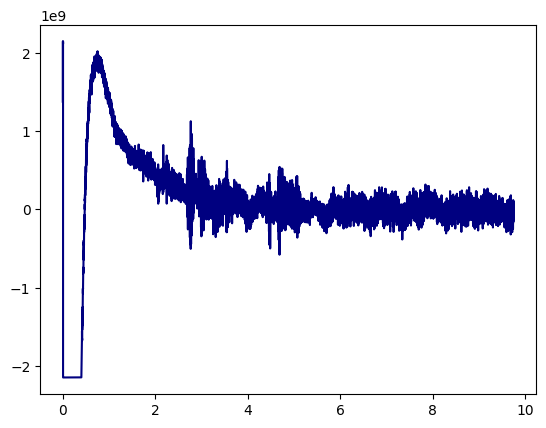

In [12]:
# plot 
plt.plot(time_arr, audio_arr, color="navy"); # color is arbitrary

In [21]:
# record audio
import pyaudio
p = pyaudio.PyAudio() # initialize PyAudio class

In [25]:
# make stream function

frame_rate = 16000 # 16 KHz
n_channel = 1 # mono
frames_per_buffer = 3200
int_format = pyaudio.paInt32 # 32 bit integer

stream = p.open(
    rate=frame_rate, 
    channels=n_channel, 
    input=True, # set as input because we want input our voice
    frames_per_buffer=frames_per_buffer,
    format = int_format, 
)

In [38]:
# start recording
time = 5 # in seconds
frames = []
end_idx = int(frame_rate/frames_per_buffer * time)

print("Start Recording")
stream.start_stream()
for i in range(0, end_idx):
    frames.append(stream.read(frames_per_buffer))
stream.stop_stream()

audio = wave.open("caca2.wav", "wb")
audio.setframerate(frame_rate)
audio.setnchannels(n_channel)
audio.setsampwidth(p.get_sample_size(int_format))
audio.writeframes(b"".join(frames)) # join frames into binary string

Start Recording


In [40]:
# Manipulate audio
from pydub import AudioSegment

In [43]:
audio2 = AudioSegment.from_wav("caca2.wav")

# increase audio volume by 10 db
audio2 = audio2 + 10

# repeat audio twice
audio2 = audio2 * 2

# fade out audio by 2000 ms
audio2 = audio2.fade_out(2000)

# export file into mp3 file
audio2.export(out_f="caca3.wav", format='mp3')

<_io.BufferedRandom name='caca3.wav'>

In [45]:
# help(audio2.export)
# use this in case you need help regarding info about some functions

### Speech Recognition in Python

Make account in Assembly AI website, and copy your token\
The steps of program consists in 4 steps
1. Upload your sound file into Assembly AI using API
2. Start doing the transcription
3. Check whether the transcribe is finished
4. Save the transcription file locally

In [46]:
token = "eb785db9514c4c67918173b2f159ce9a"

In [47]:
# import library
import requests

In [124]:
import requests
token = "eb785db9514c4c67918173b2f159ce9a"


class VoiceRecognition():
    def __init__(self, filename, token=token):
        self.filename = filename
        self.token = token
        self.headers = {'authorization': self.token}

    def read_file(self, chunk_size=5242880):  # chunk size = 5 MB
        with open(self.filename, "rb") as file:
            while True:
                data = file.read(chunk_size)
                if not data:  # if data is finished read
                    break
                yield data

    def upload_file(self):
        response = requests.post(url='https://api.assemblyai.com/v2/upload',
                                 headers=self.headers,
                                 data=self.read_file(self.filename))
        upload_url = response.json()['upload_url']
        return upload_url

    def transcribe(self):
        upload_url = self.upload_file()
        json = {"audio_url": upload_url}
        response2 = requests.post(url='https://api.assemblyai.com/v2/transcript',
                                  json=json,
                                  headers=self.headers)
        return response2.json()['id']

    def get_transription(self):
        ids = self.transcribe()
        while True:
            response3 = requests.get(url='https://api.assemblyai.com/v2/transcript/' + ids,
                                     headers=self.headers)
            if (response3.json()['status'] == 'completed'):
                break
        return response3.json()['text']


filename = "caca.wav"
recog = VoiceRecognition(filename)
text = recog.get_transription()
print(text)

TypeError: argument should be integer or None, not 'str'

In [118]:
# check the response
upload_url = upload_file(filename, token)
upload_url

'https://cdn.assemblyai.com/upload/f5e229ca-b9c5-4f8f-b7ca-06fb1bc34935'

In [119]:
# 2. transcribe 

def transcribe(upload_url, token):
    headers = {'authorization': token}
    json = {"audio_url": upload_url}
    response2 = requests.post(url='https://api.assemblyai.com/v2/transcript',
                            json=json,
                            headers=headers)
    return response2.json()['id']

In [120]:
# check the response
ids = transcribe(upload_url, token)
ids

'rwexmxajgw-40d4-4506-9875-e32d6116463e'

In [121]:
import time

In [122]:
# 3. Check whether the transcribe is finished
headers = {'authorization': token}
start = time.time()
while True:
    response3 = requests.get(url='https://api.assemblyai.com/v2/transcript/' + ids,
                         headers=headers)
    if (response3.json()['status'] == 'completed'):
        break
end = time.time()
print(f"Required {round(end-start, 2)} seconds")
print(response3.json()['text'])

Required 6.24 seconds
Salsa Villa is so beautiful yet intelligent. But she has an ugly attitude.


FULL CODE

In [132]:
import requests
token = "eb785db9514c4c67918173b2f159ce9a"

class VoiceRecognition():
    def __init__(self, filename, token=token):
        self.filename = filename
        self.token = token
        self.headers = {'authorization': self.token}

    def read_file(self, chunk_size=5242880): # chunk size = 5 MB
        with open(self.filename, "rb") as file:
            while True:
                data = file.read(chunk_size)
                if not data: # if data is finished read
                    break
                yield data

    def upload_file(self):
        response = requests.post(url='https://api.assemblyai.com/v2/upload',
                                headers= self.headers,
                                data=self.read_file())
        upload_url = response.json()['upload_url']
        return upload_url
    
    def transcribe(self):
        self.upload_url = self.upload_file()
        json = {"audio_url": self.upload_url}
        response2 = requests.post(url='https://api.assemblyai.com/v2/transcript',
                                json=json,
                                headers=self.headers)
        return response2.json()['id']
    
    def get_transription(self):
        ids = self.transcribe()
        while True:
            response3 = requests.get(url='https://api.assemblyai.com/v2/transcript/' + ids,
                                headers=self.headers)
            if (response3.json()['status'] == 'completed'):
                break
        return response3.json()['text']

filename = "caca2.wav"
recog = VoiceRecognition(filename)
text = recog.get_transription()
print(text)

Opie to let a beach hunting.
